#Objective:

A nationwide survey of hospital costs conducted by the US Agency for Healthcare consists of hospital records of inpatient samples. The given data is restricted to the city of Wisconsin and relates to patients in the age group 0-17 years. The agency wants to analyze the data to research on healthcare costs and their utilization.

In [ ]:
library(readxl)
library(tidyverse)
library(data.table)
library(ggcorrplot)
library(MASS)
library(patchwork)
library(lattice)

options(warn=-1)

In [4]:
install.packages("ggcorrplot")
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
hospital_data = read_excel("/content/hospitalcosts.xlsx")

In [6]:
summary(hospital_data) 

      AGE             FEMALE           LOS              RACE      
 Min.   : 0.000   Min.   :0.000   Min.   : 0.000   Min.   :1.000  
 1st Qu.: 0.000   1st Qu.:0.000   1st Qu.: 2.000   1st Qu.:1.000  
 Median : 0.000   Median :1.000   Median : 2.000   Median :1.000  
 Mean   : 5.086   Mean   :0.512   Mean   : 2.828   Mean   :1.078  
 3rd Qu.:13.000   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.:1.000  
 Max.   :17.000   Max.   :1.000   Max.   :41.000   Max.   :6.000  
                                                   NA's   :1      
     TOTCHG          APRDRG     
 Min.   :  532   Min.   : 21.0  
 1st Qu.: 1216   1st Qu.:640.0  
 Median : 1536   Median :640.0  
 Mean   : 2774   Mean   :616.4  
 3rd Qu.: 2530   3rd Qu.:751.0  
 Max.   :48388   Max.   :952.0  
                                

In [13]:
str(hospital_data)

tibble [500 × 6] (S3: tbl_df/tbl/data.frame)
 $ AGE   : num [1:500] 17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE: num [1:500] 1 0 1 1 1 0 1 1 1 1 ...
 $ LOS   : num [1:500] 2 2 7 1 1 0 4 2 1 2 ...
 $ RACE  : num [1:500] 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG: num [1:500] 2660 1689 20060 736 1194 ...
 $ APRDRG: num [1:500] 560 753 930 758 754 347 754 754 753 758 ...


In [14]:
colnames(hospital_data)

[1] "AGE"    "FEMALE" "LOS"    "RACE"   "TOTCHG" "APRDRG"

In [15]:
any(is.na(hospital_data))

[1] TRUE

In [16]:
hospital_data1=na.omit(hospital_data)

In [11]:
any(is.na(hospital_data1))

[1] FALSE

In [17]:
unique(hospital_data1[c("RACE")])

RACE
<dbl>
1
4
6
2
5
3


In [18]:
as.data.frame(table(hospital_data1[c("RACE")]))

Var1,Freq
<fct>,<int>
1,484
2,6
3,1
4,3
5,3
6,2


In [19]:
hospital_data1$RACE <- as.character(hospital_data1$RACE)
hospital_data1$AGE <- as.integer(hospital_data1$AGE)
hospital_data1$FEMALE <- as.character(hospital_data1$FEMALE)

In [20]:
a=table(hospital_data1$AGE)

In [21]:
as.data.frame(a)

Var1,Freq
<fct>,<int>
0,306
1,10
2,1
3,3
4,2
5,2
6,2
7,3
8,2


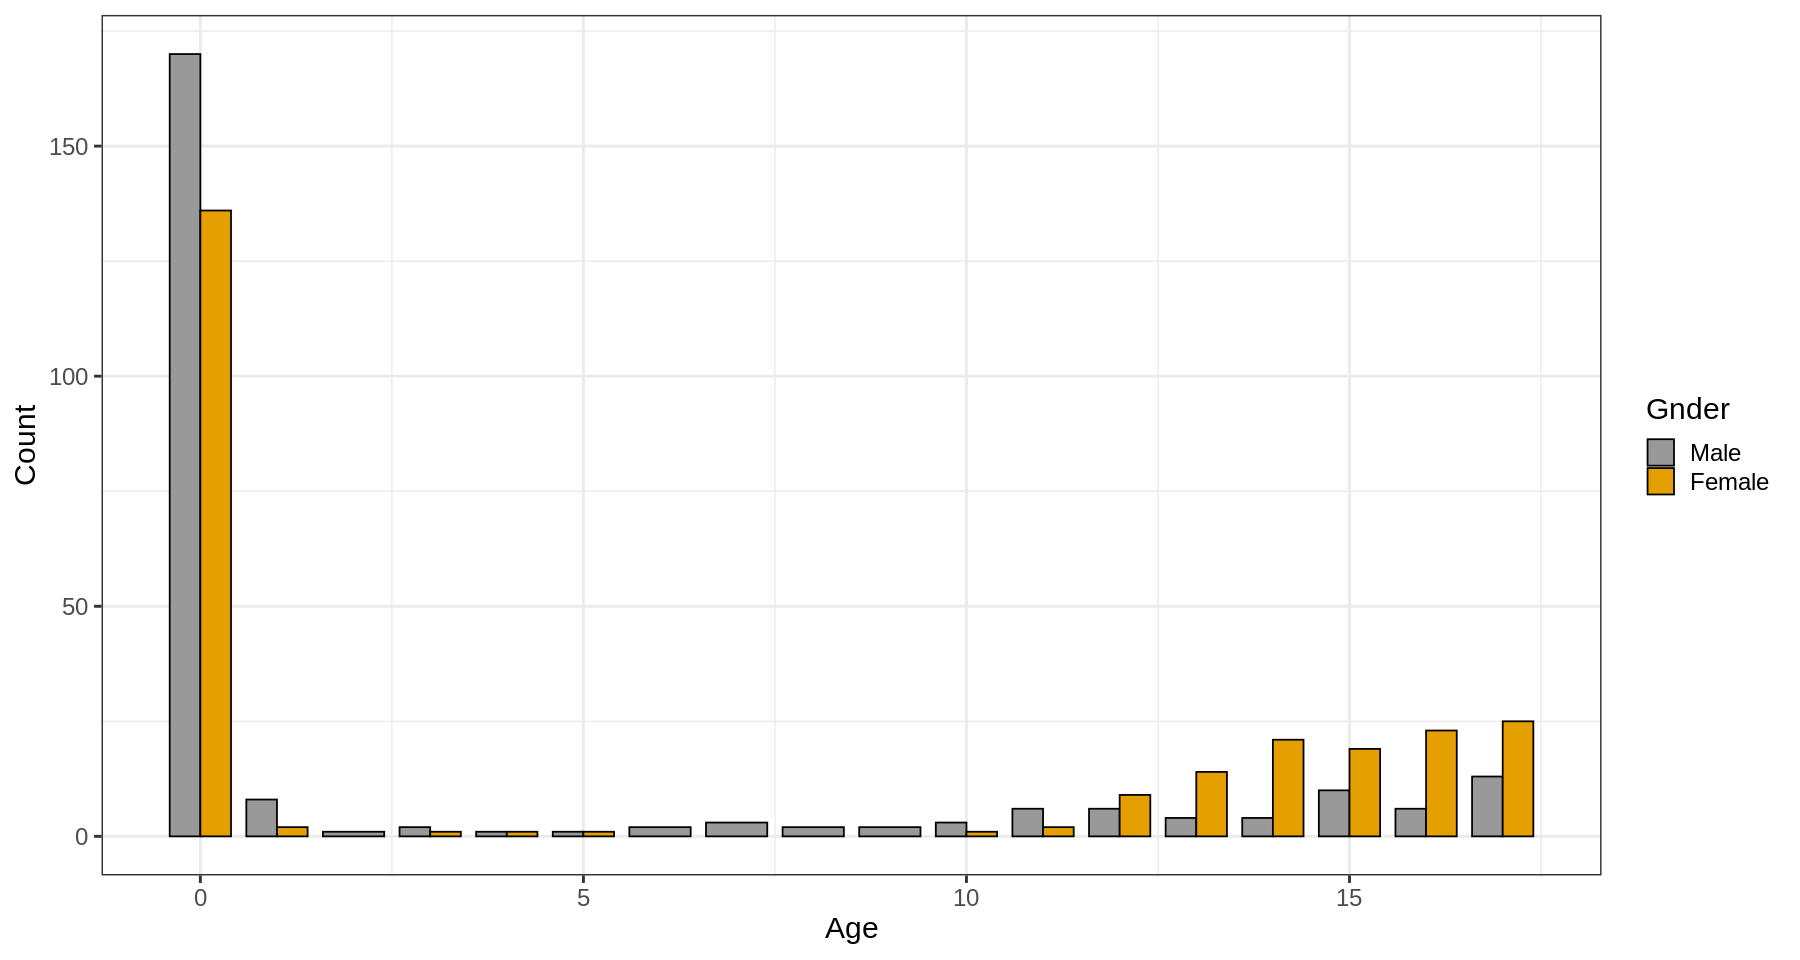

In [22]:
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(hospital_data1, aes(x = AGE, fill=FEMALE)) +
geom_bar( color="black", position=position_dodge(width=0.8),width=0.8)+
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))+
scale_fill_manual(values=c("#999999", "#E69F00"), name="Gnder",
                         labels=c("Male", "Female"))+
theme_bw(base_size = 18)+                         
ylab("Count") + xlab("Age")

In [23]:
DT <- data.table(hospital_data1)
x=DT[, .N, by = list(AGE,FEMALE)]
y=DT[, .N, by = list(AGE)]

In [25]:
Mean=aggregate(hospital_data1$TOTCHG, list(hospital_data1$RACE), FUN=mean) 
Min=aggregate(hospital_data1$TOTCHG, list(hospital_data1$RACE), FUN=min) 
Max=aggregate(hospital_data1$TOTCHG, list(hospital_data1$RACE), FUN=max) 

In [26]:
hospital_data1$AGE <- as.character(hospital_data1$AGE)


In [27]:
totcharge=hospital_data1 %>% group_by(RACE)%>%  summarize(minTOTCHG = min(TOTCHG), meanTOTCHG = mean(TOTCHG),
               maxTOTCHG = max(TOTCHG))

In [28]:
totcharge

RACE,minTOTCHG,meanTOTCHG,maxTOTCHG
<chr>,<dbl>,<dbl>,<dbl>
1,532,2772.669,48388
2,1153,4202.167,10002
3,3041,3041.000,3041
4,1173,2344.667,3126
5,615,2026.667,4072
6,1163,1349.000,1535


In [29]:
totcharge$RACE = as.numeric(totcharge$RACE)

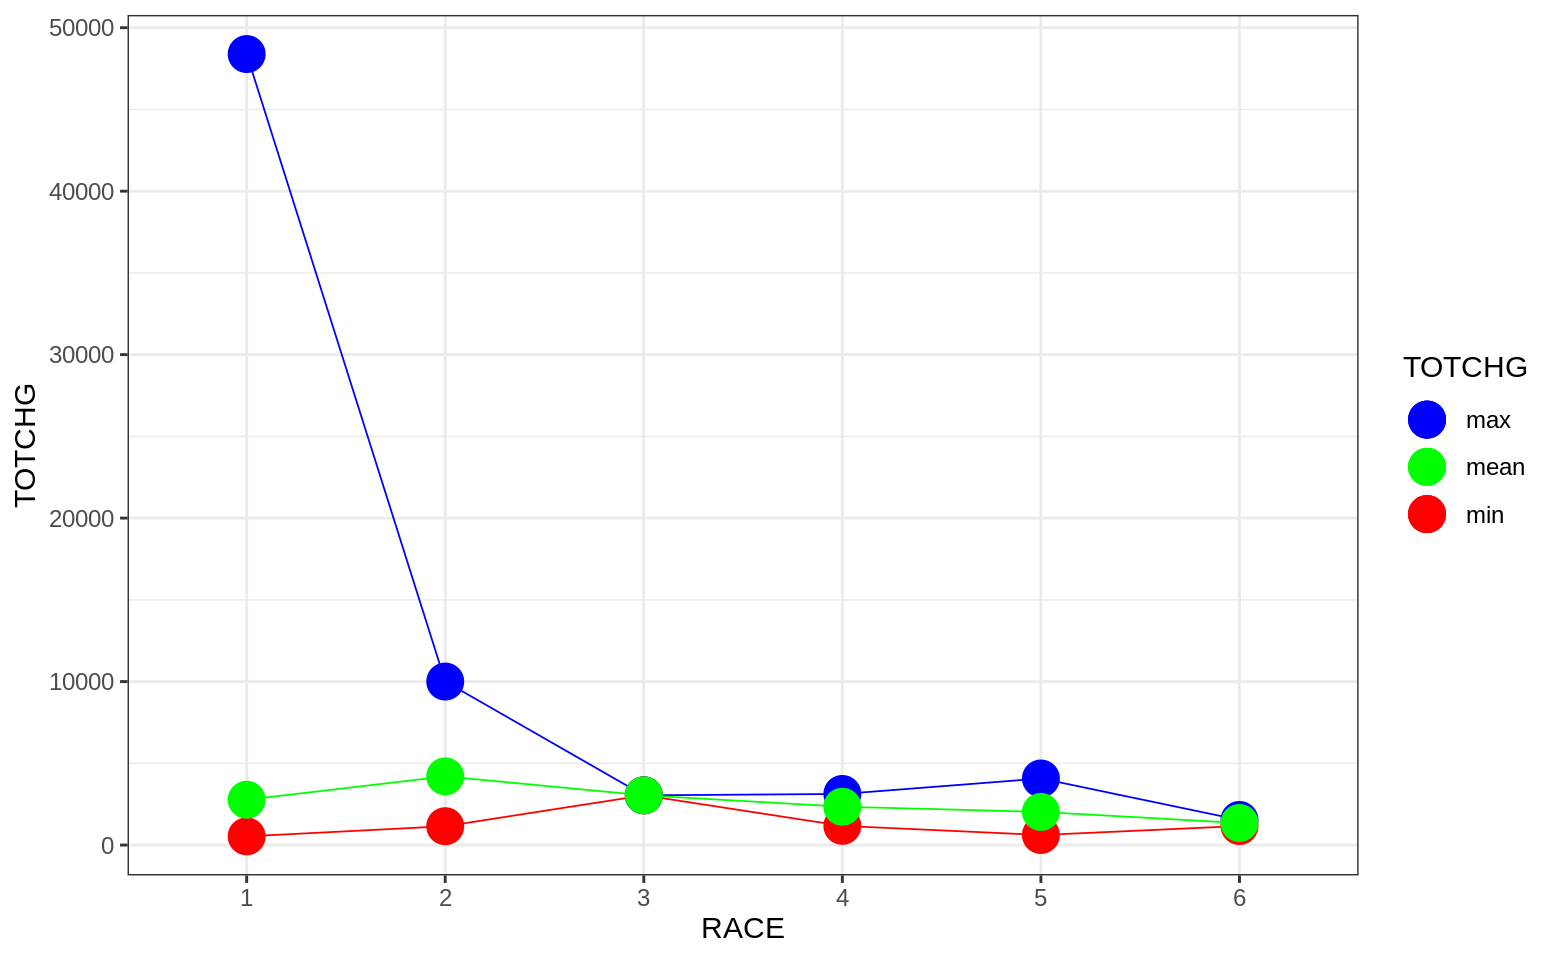

In [35]:
options(repr.plot.width = 13, repr.plot.height = 8)

ggplot(data=totcharge) +
geom_point(  size=10,  aes(x=RACE, y=minTOTCHG, color="red"))+
geom_line(aes(x=RACE, y=minTOTCHG),color="red")+
geom_point(  size=10, aes(x=RACE, y=maxTOTCHG, color="blue"))+
geom_line(aes(x=RACE, y=maxTOTCHG),color="blue")+
geom_point( size=10, aes(x=RACE, y=meanTOTCHG ,color="green"))+
geom_line(aes(x=RACE, y=meanTOTCHG),color="green")+
scale_color_manual(name="TOTCHG", labels = c("max","mean", "min"), values = c( "blue","green","red")) +
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))+
theme_bw(base_size = 18) +
scale_x_discrete(name ="RACE", limits=totcharge$RACE)+
ylab("TOTCHG")

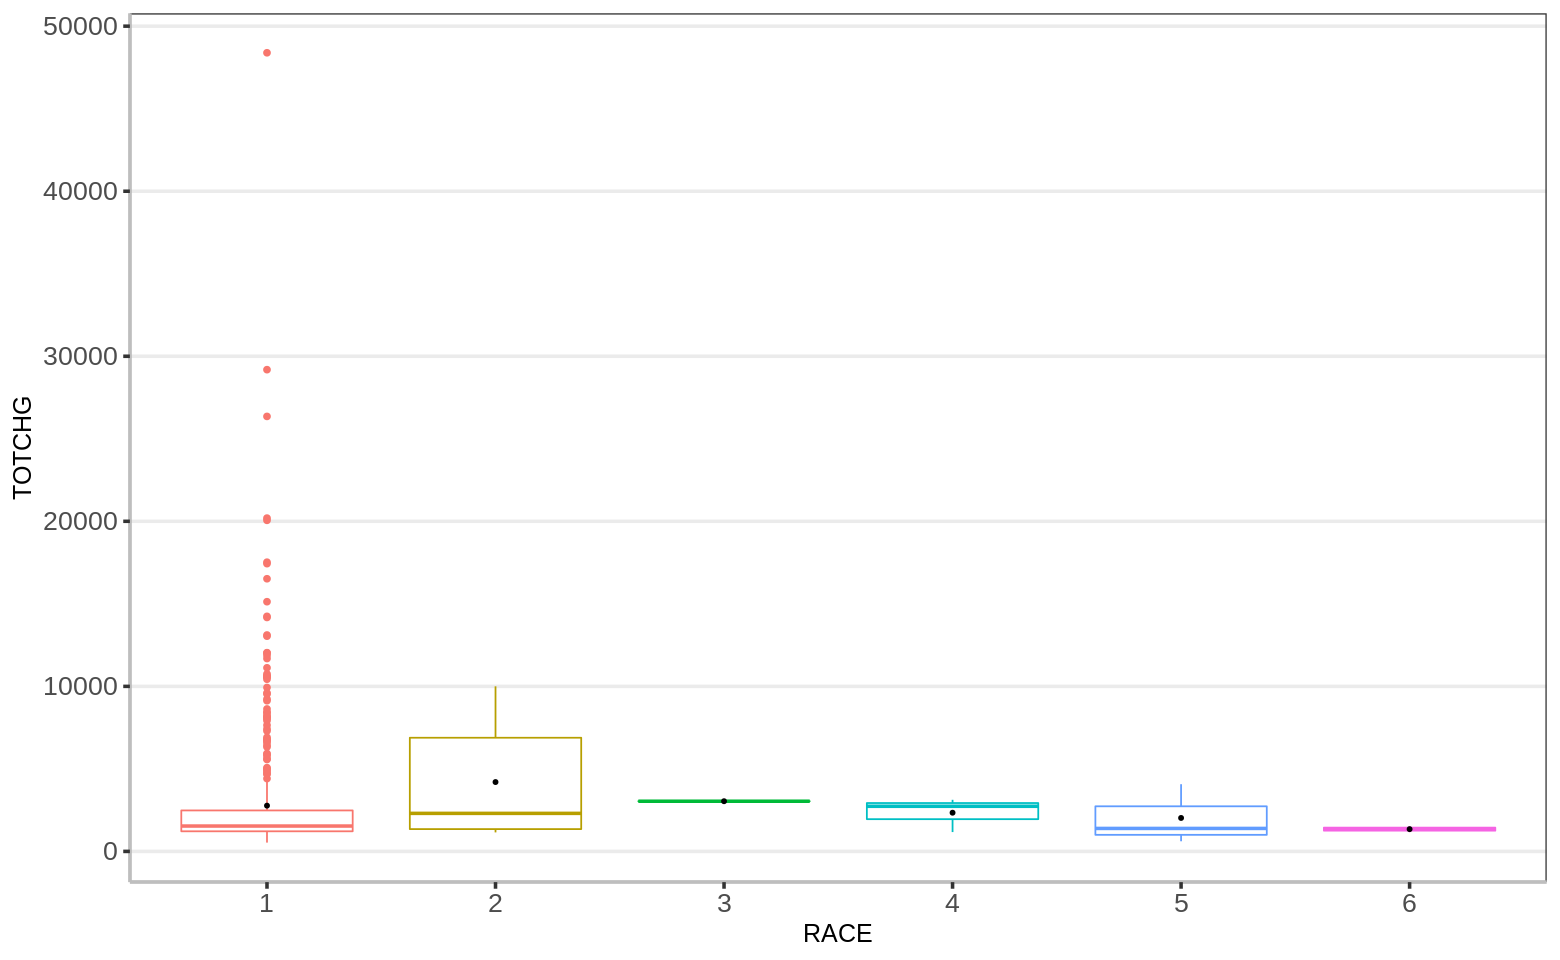

In [36]:
options(repr.plot.width = 13, repr.plot.height = 8)
ggplot(hospital_data1, aes(x=RACE, y=TOTCHG,color=RACE)) +
geom_boxplot(alpha = 1.5)+
stat_summary(fun.y="mean", geom="point", size=1, color="black")+
theme_bw(base_size = 16)+
theme(legend.position = "none",panel.background = element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.y = element_blank() ,axis.line = element_line(colour = "grey"))+
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))



In [39]:
hospital_data1$APRDRG=as.numeric(hospital_data1$APRDRG)
hospital_data1$FEMALE=as.numeric(hospital_data1$FEMALE)
hospital_data1$APRDRG=as.numeric(hospital_data1$APRDRG)
hospital_data1$RACE=as.numeric(hospital_data1$RACE)
hospital_data1$AGE=as.numeric(hospital_data1$AGE)

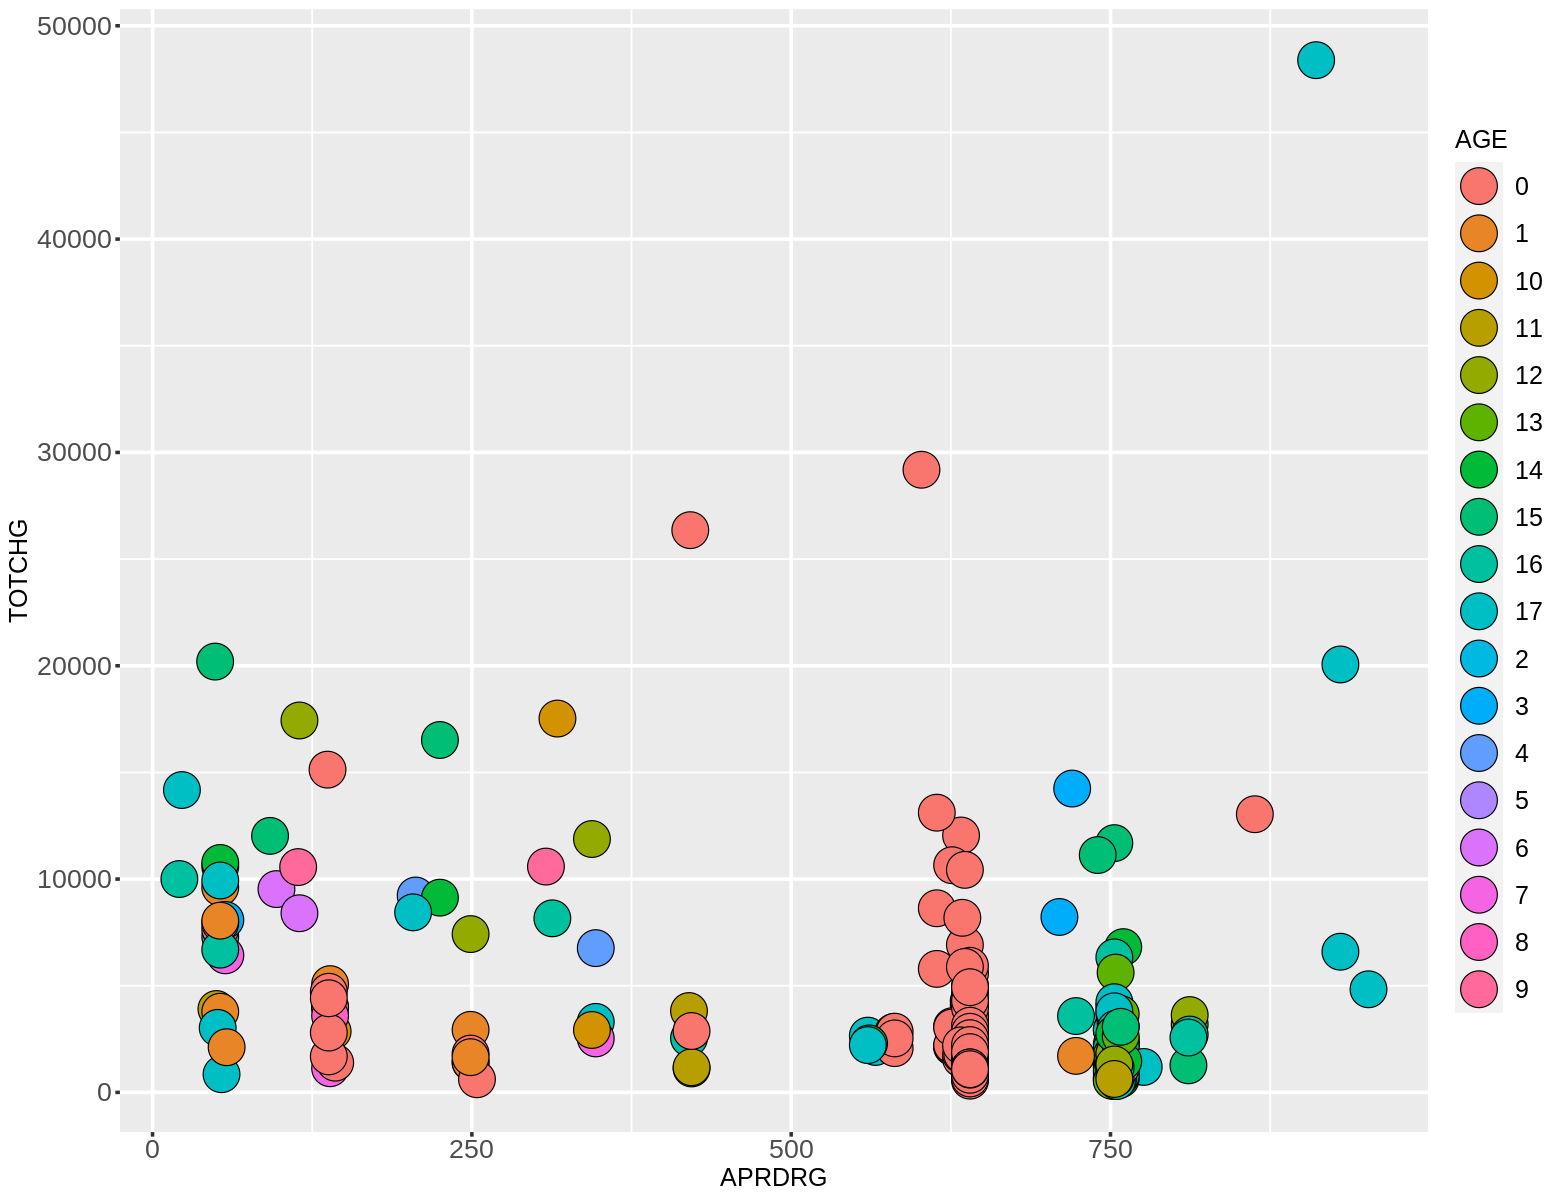

In [38]:
hospital_data1$AGE=as.character(hospital_data1$AGE)
hospital_data1$FEMALE=as.character(hospital_data1$FEMALE)
hospital_data1$RACE=as.character(hospital_data1$RACE)

options(repr.plot.width = 13, repr.plot.height = 10)

ggplot(hospital_data1, aes(x=APRDRG, y=TOTCHG,fill=AGE)) +
geom_point(shape = 21,size = 10)+
#scale_fill_discrete( name="Gender", labels=c("Male", "Female"))+
theme(legend.text=element_text(size=15),legend.title=element_text(size=15))+
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))                       


In [40]:
corr <- round(cor(hospital_data1), 1)

In [41]:
str(hospital_data1)

tibble [499 × 6] (S3: tbl_df/tbl/data.frame)
 $ AGE   : num [1:499] 17 17 17 17 17 17 17 16 16 17 ...
 $ FEMALE: num [1:499] 1 0 1 1 1 0 1 1 1 1 ...
 $ LOS   : num [1:499] 2 2 7 1 1 0 4 2 1 2 ...
 $ RACE  : num [1:499] 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTCHG: num [1:499] 2660 1689 20060 736 1194 ...
 $ APRDRG: num [1:499] 560 753 930 758 754 347 754 754 753 758 ...
 - attr(*, "na.action")= 'omit' Named int 277
  ..- attr(*, "names")= chr "277"


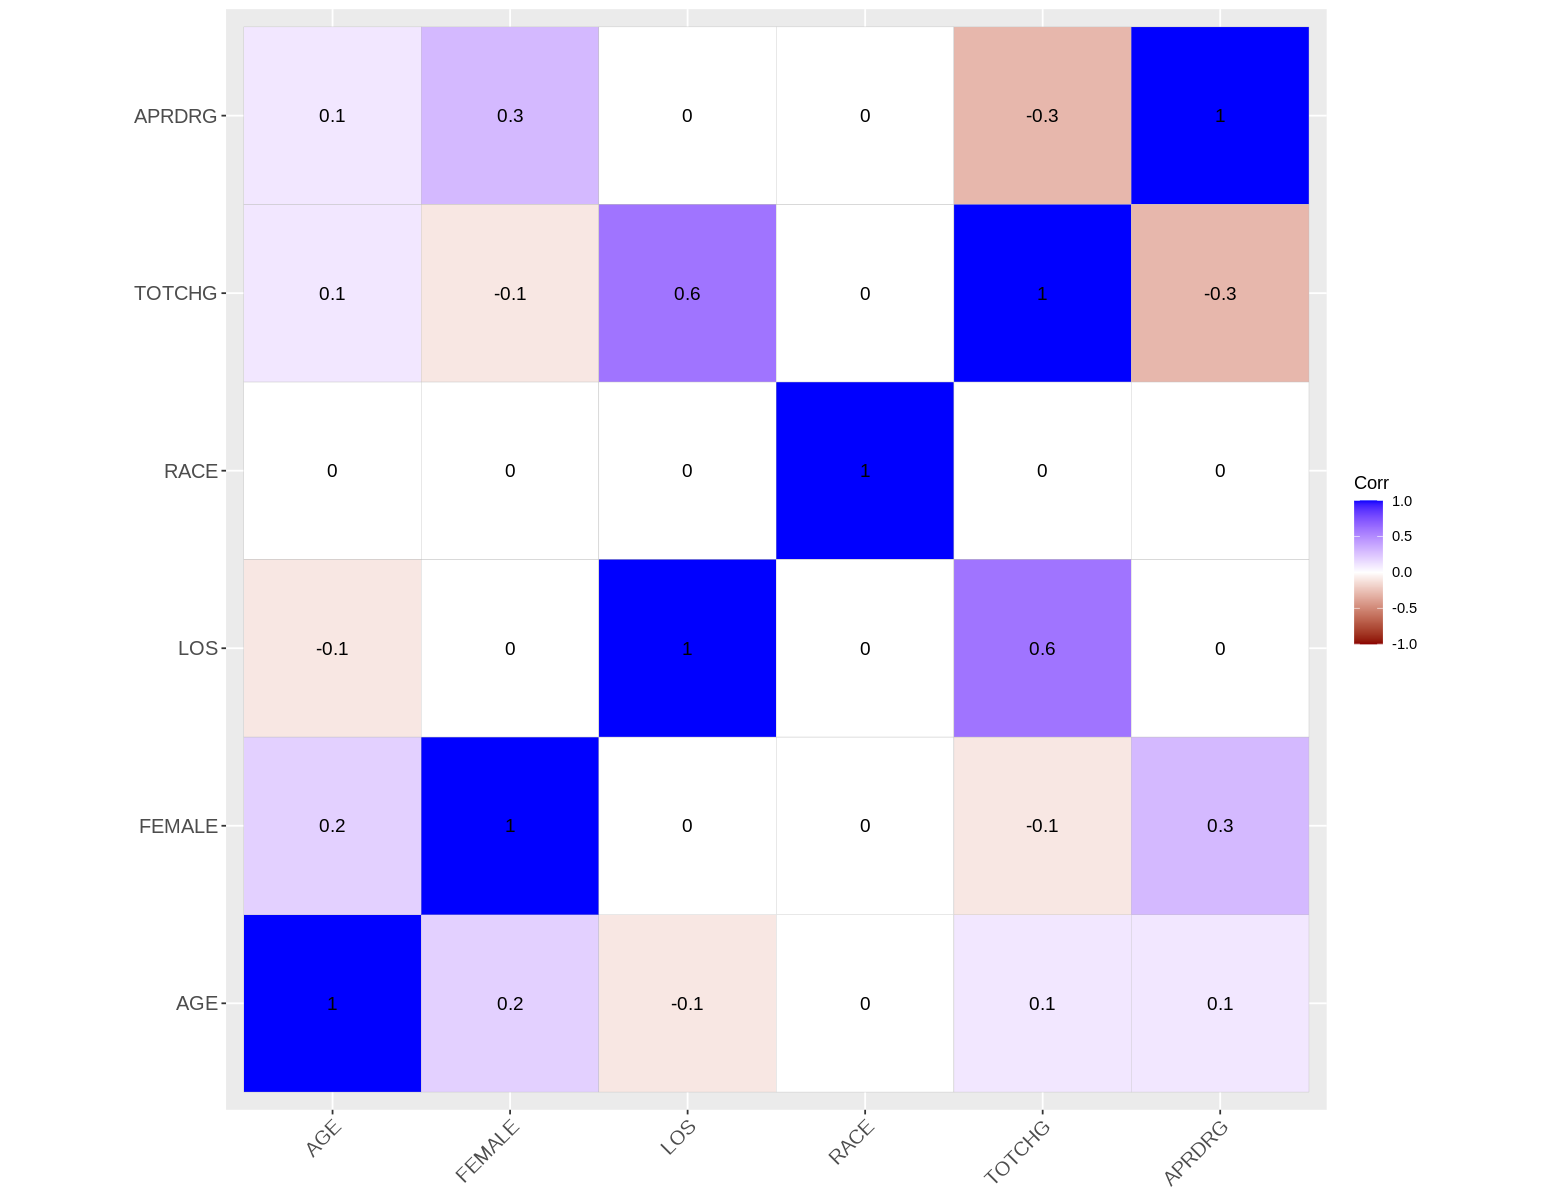

In [42]:
ggcorrplot(corr,lab = TRUE,ggtheme = ggplot2::theme_gray,colors = c("darkred", "white", "blue"))


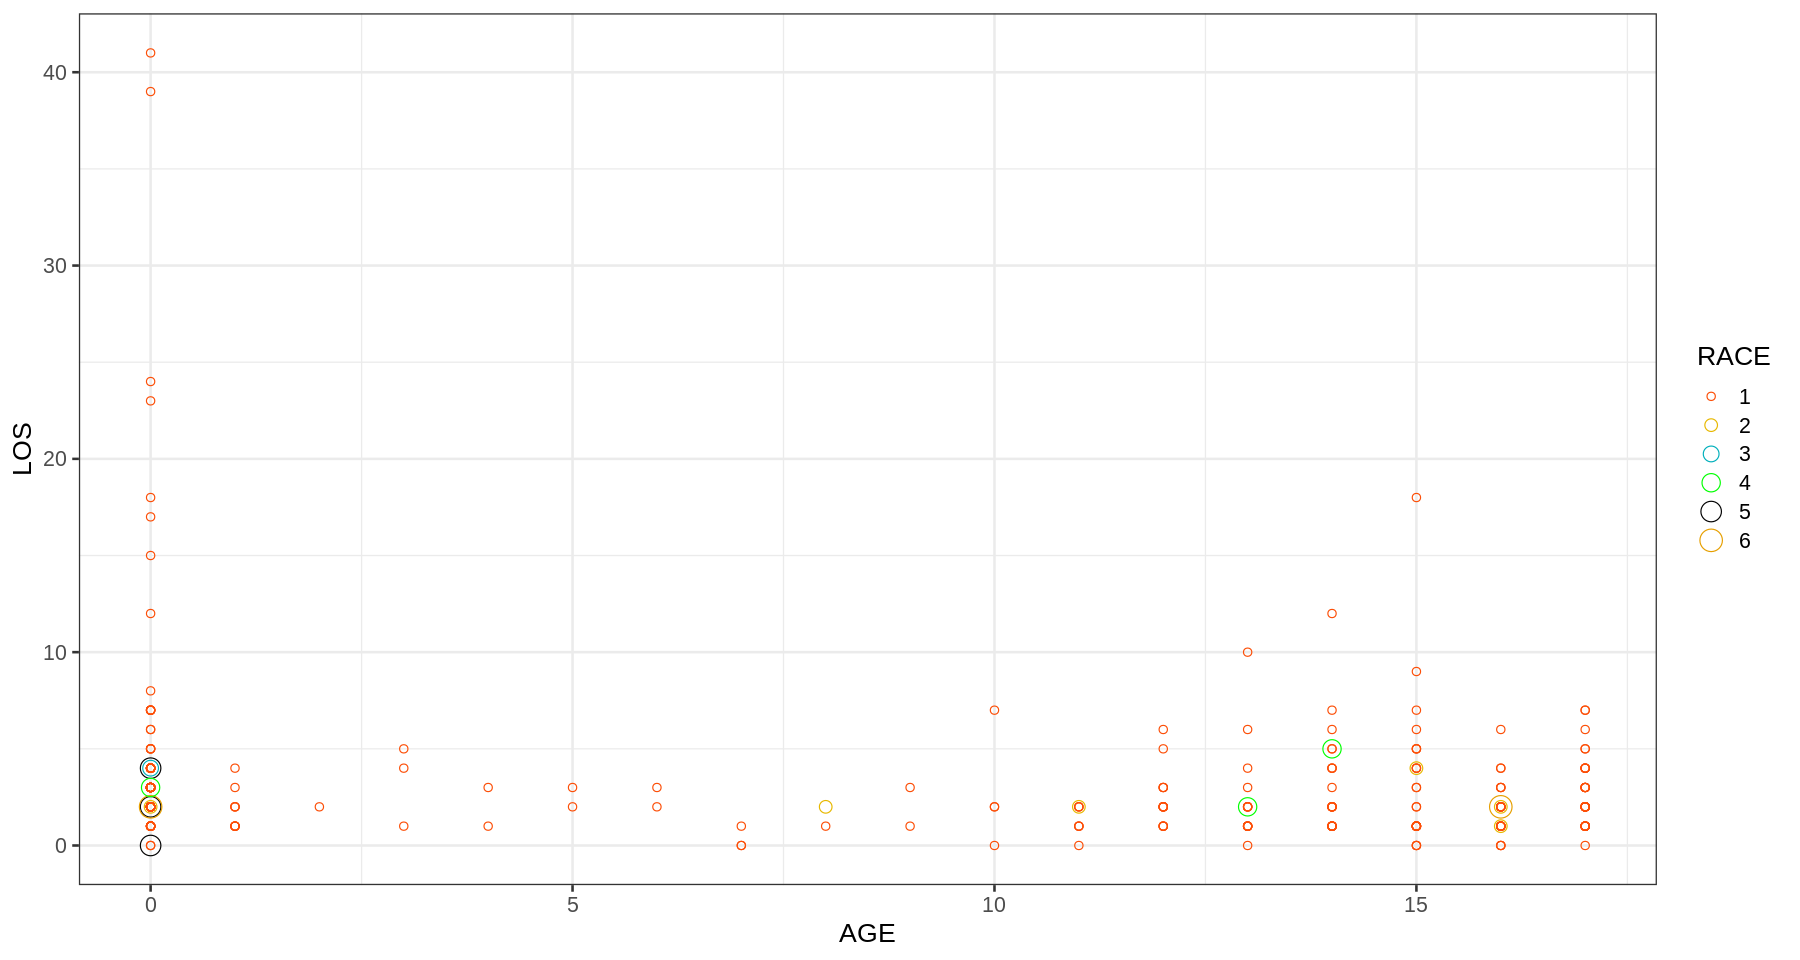

In [44]:
hospital_data1$RACE=as.character(hospital_data1$RACE)
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(hospital_data1, aes(x=AGE, y=LOS,   color=RACE, size=RACE))+
geom_point(shape=1, fill="white")+
theme_bw(base_size = 16)+
scale_color_manual(values = c("#FC4E07", "#E7B800", "#00AFBB", "green", "black", "#E69F00"))


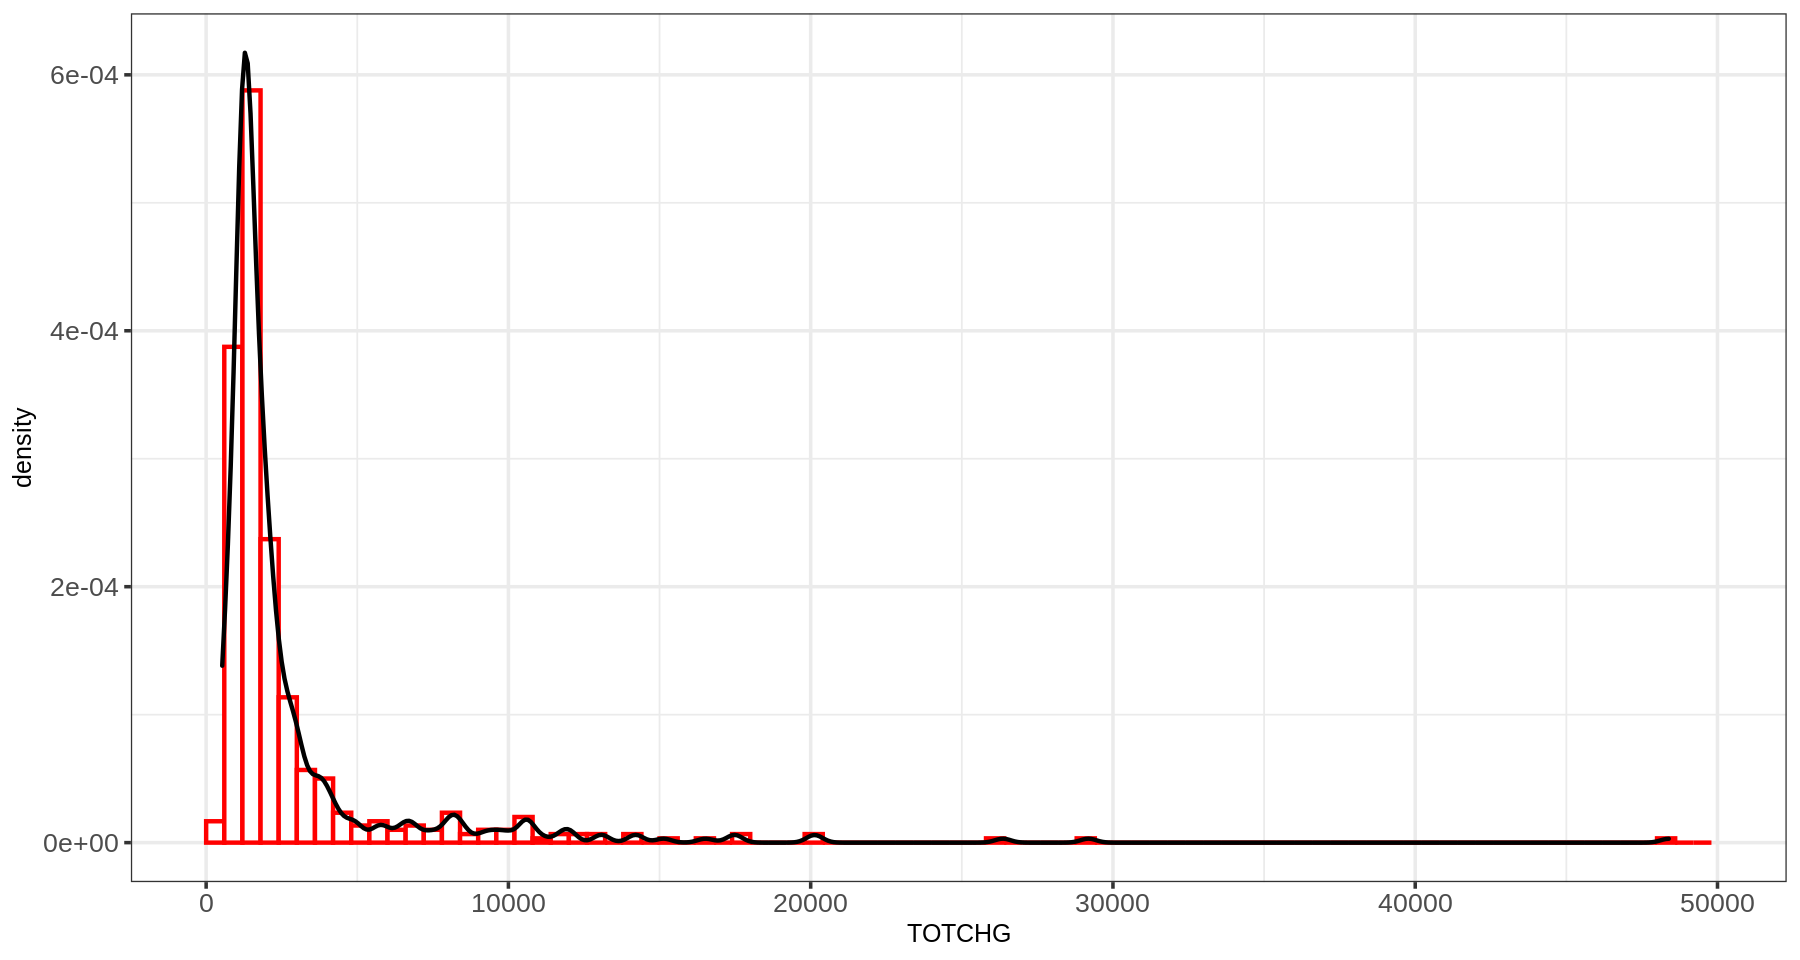

In [45]:
ggplot(data=hospital_data1, aes(TOTCHG)) + 
geom_histogram(aes(y =..density..), col="red", 
                 fill="white", breaks=seq(0, 50000, by = 600),size=1.25) +
geom_density(color= "black",size=1.25)+
theme_bw(base_size = 16)+
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))



In [46]:
male=subset(hospital_data1, FEMALE==0)
female=subset(hospital_data1, FEMALE==1)

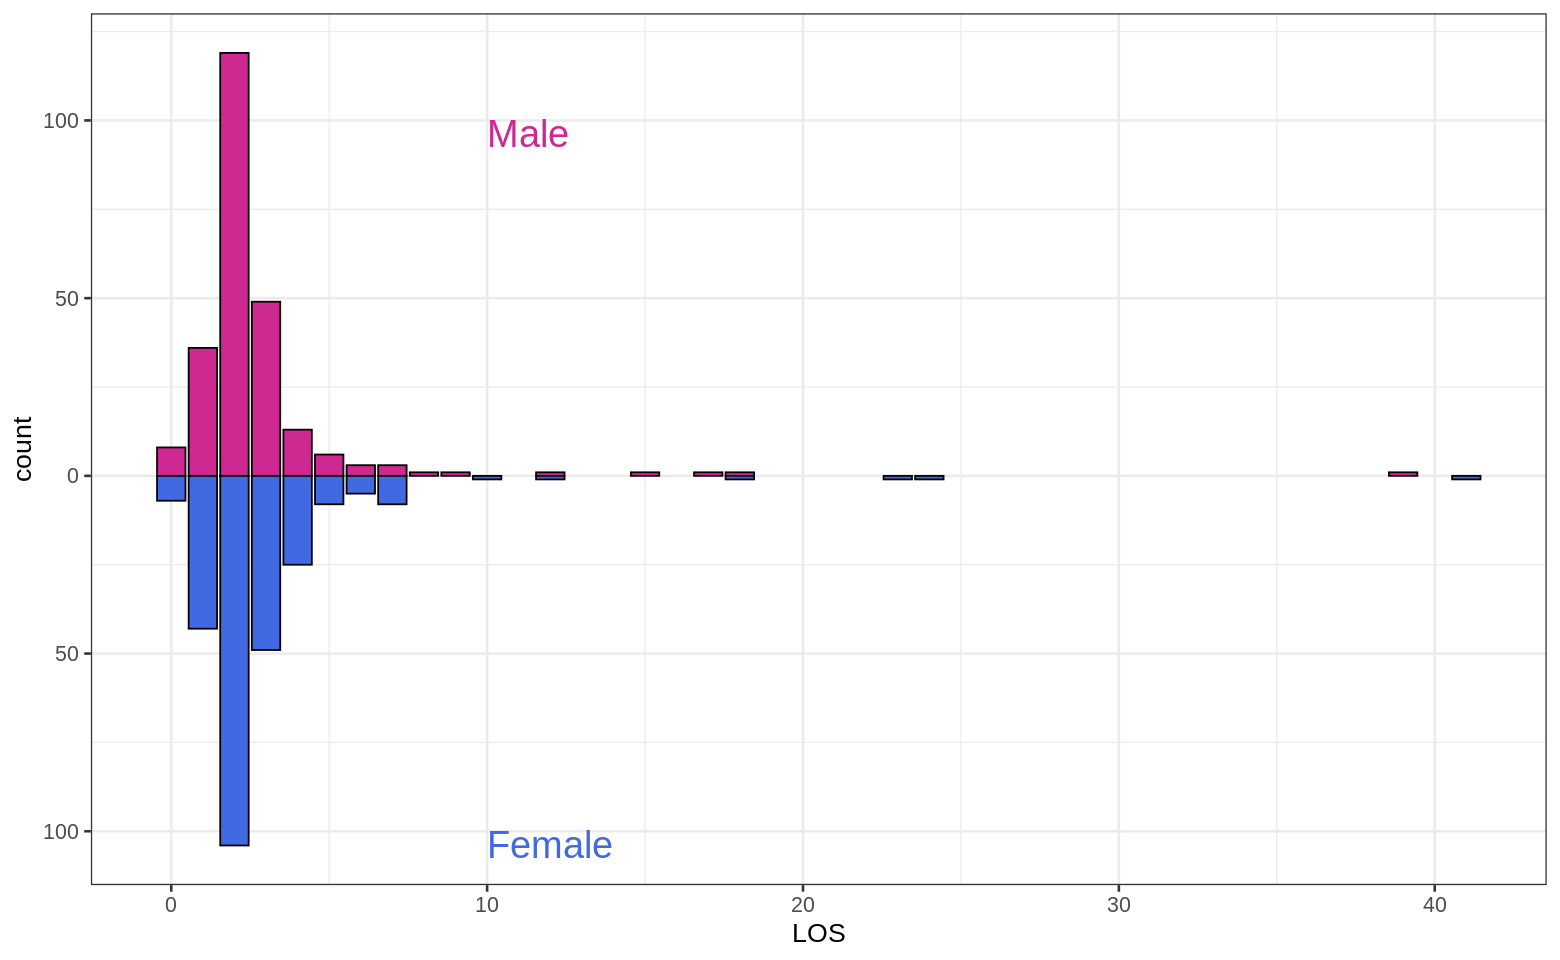

In [47]:
options(repr.plot.width = 13, repr.plot.height = 8)

ggplot() + 
geom_bar(data=male, aes(x=LOS, y=..count.. ), fill="maroon3",color='black',show.legend = T)+ 
geom_bar(data=female, aes(x=LOS, y=-..count..,color='black'),fill="royalblue", color='black')+
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))+
scale_y_continuous(labels = abs)+
theme(legend.position = c(0, 1),legend.justification = c(0, 1))+
theme_bw(base_size = 16)+
annotate(geom = 'text', label = 'Male', x = 10, y = 100, hjust = 0, vjust = 1, size=8,color="maroon3")+
annotate(geom = 'text', label = 'Female', x = 10, y = -100, hjust = 0, vjust = 1, size=8,color="royalblue")

In [48]:
hospital_data1$APRDRG <- as.character(hospital_data1$APRDRG)

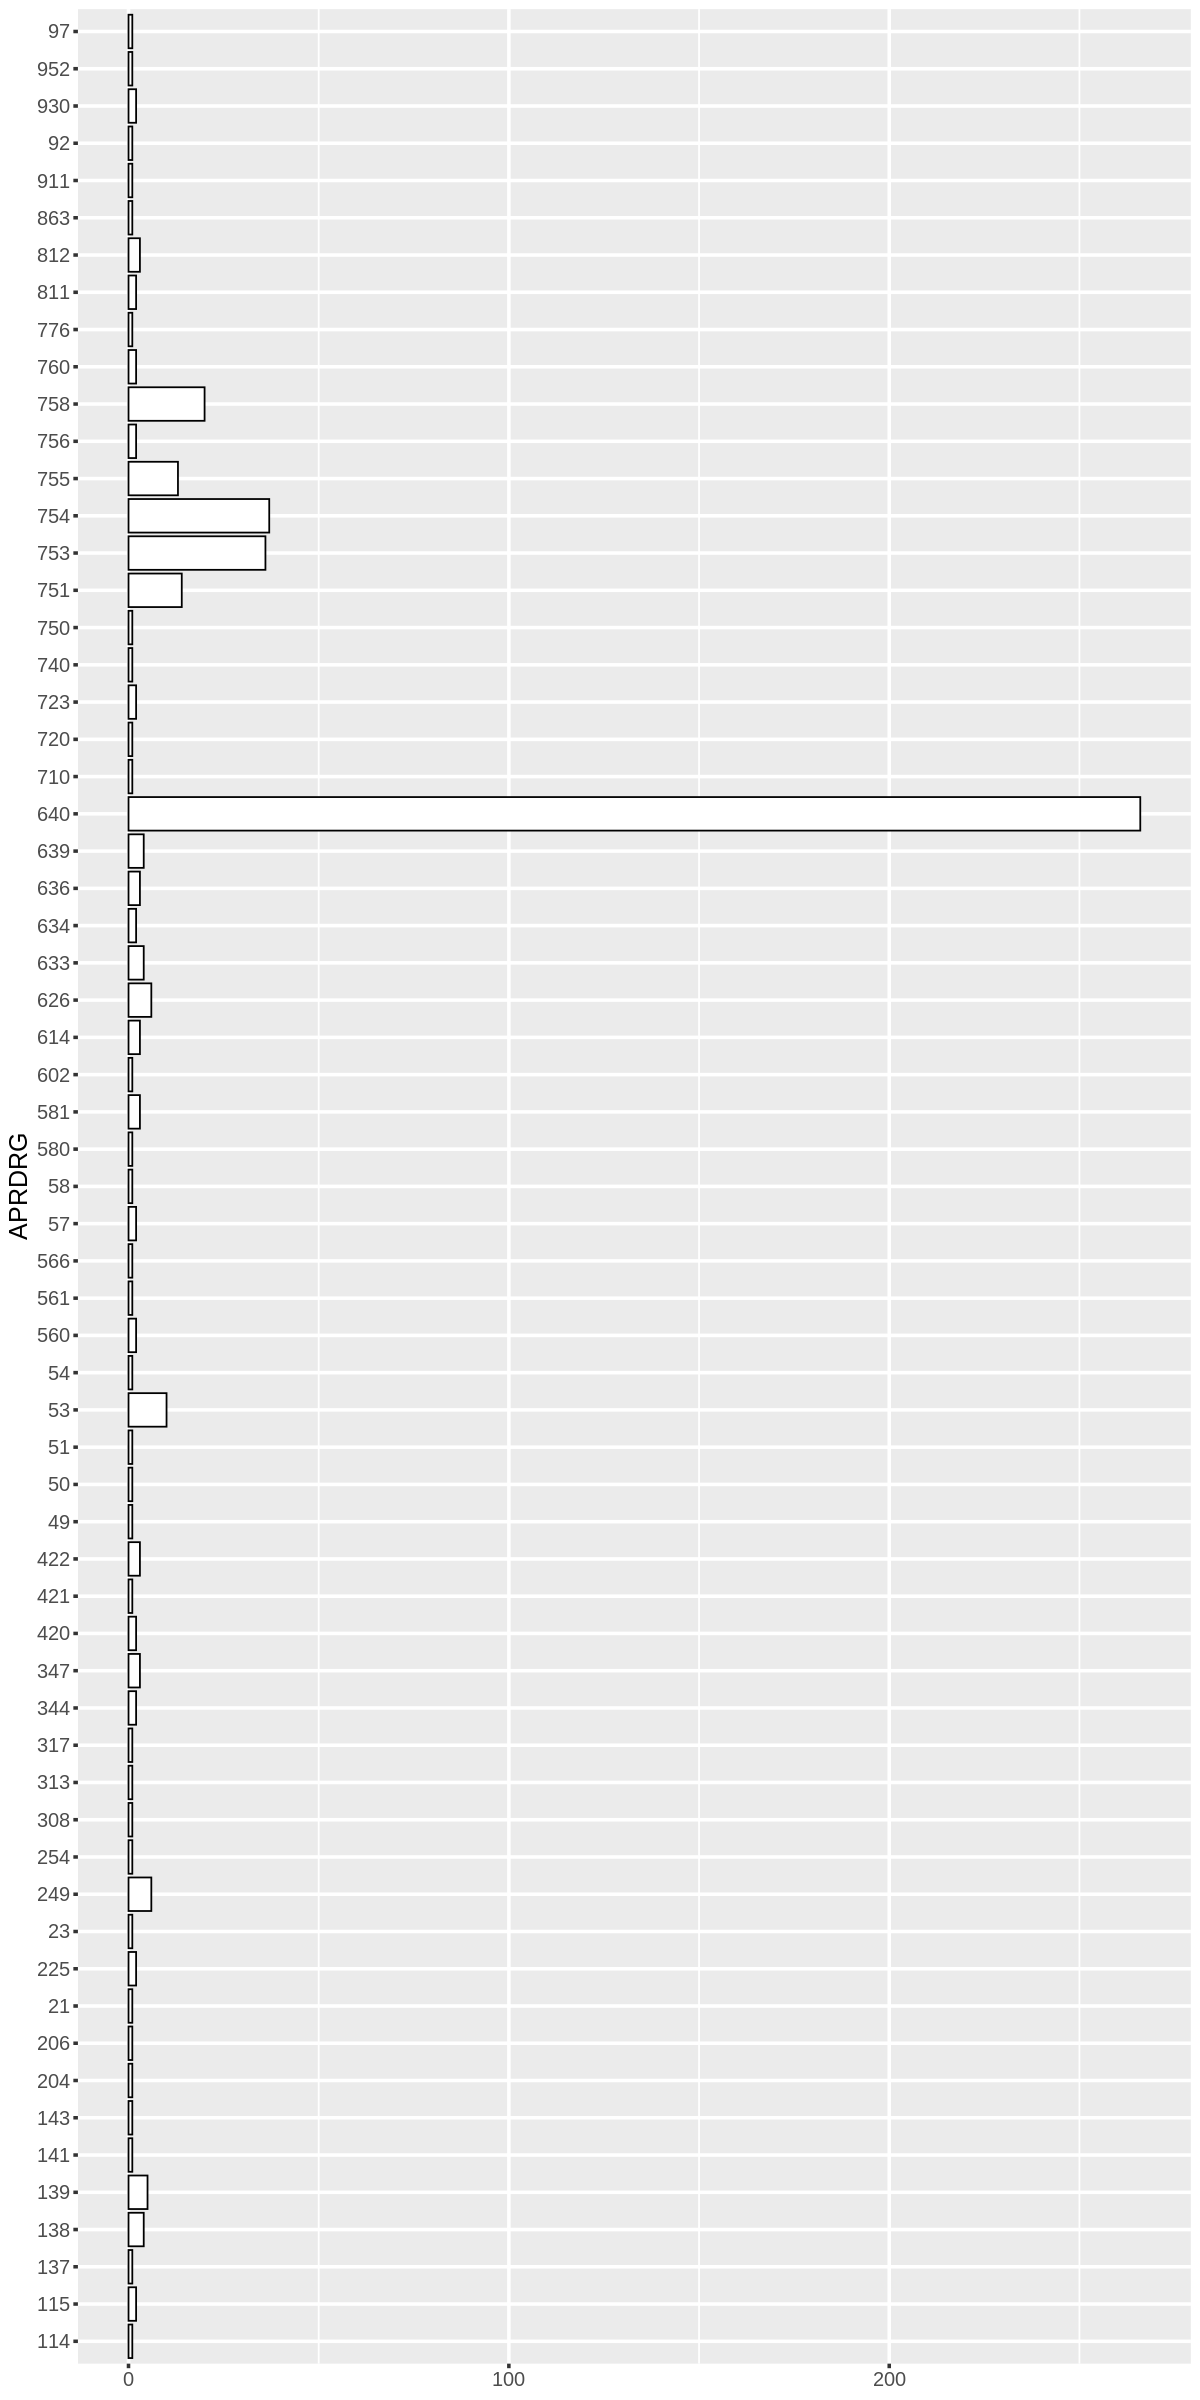

In [49]:
options(repr.plot.width = 10, repr.plot.height = 20)
ggplot(hospital_data1,aes(x=APRDRG))+geom_bar(color="black",fill="white",size=0.5) + coord_flip() +
theme(text = element_text(size = 15,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))+
xlab("APRDRG") +
theme(axis.title.x=element_blank())



 # Statistical Test 

Here we conduct a  statistical test to see wheather any of the given group has been treated unfairly. So here, the race being independent variable and the total charge is the dependent varible. The test is known as  ANOVA test. A one-way ANOVA is a statistical test used to determine whether or not there is a significant difference between the means of three or more independent groups. Following are the requirements of ANOVA test. 


1. Normality of residuals: The errors used for the estimation of the error term(s) (MSE) are normally distributed.
2. Homogeneity of Variances: the variances across all the groups (cells) of
between-subject effects are the same.
3. Observations are indpendent identically distributed.

4. Look for Outliers in each group




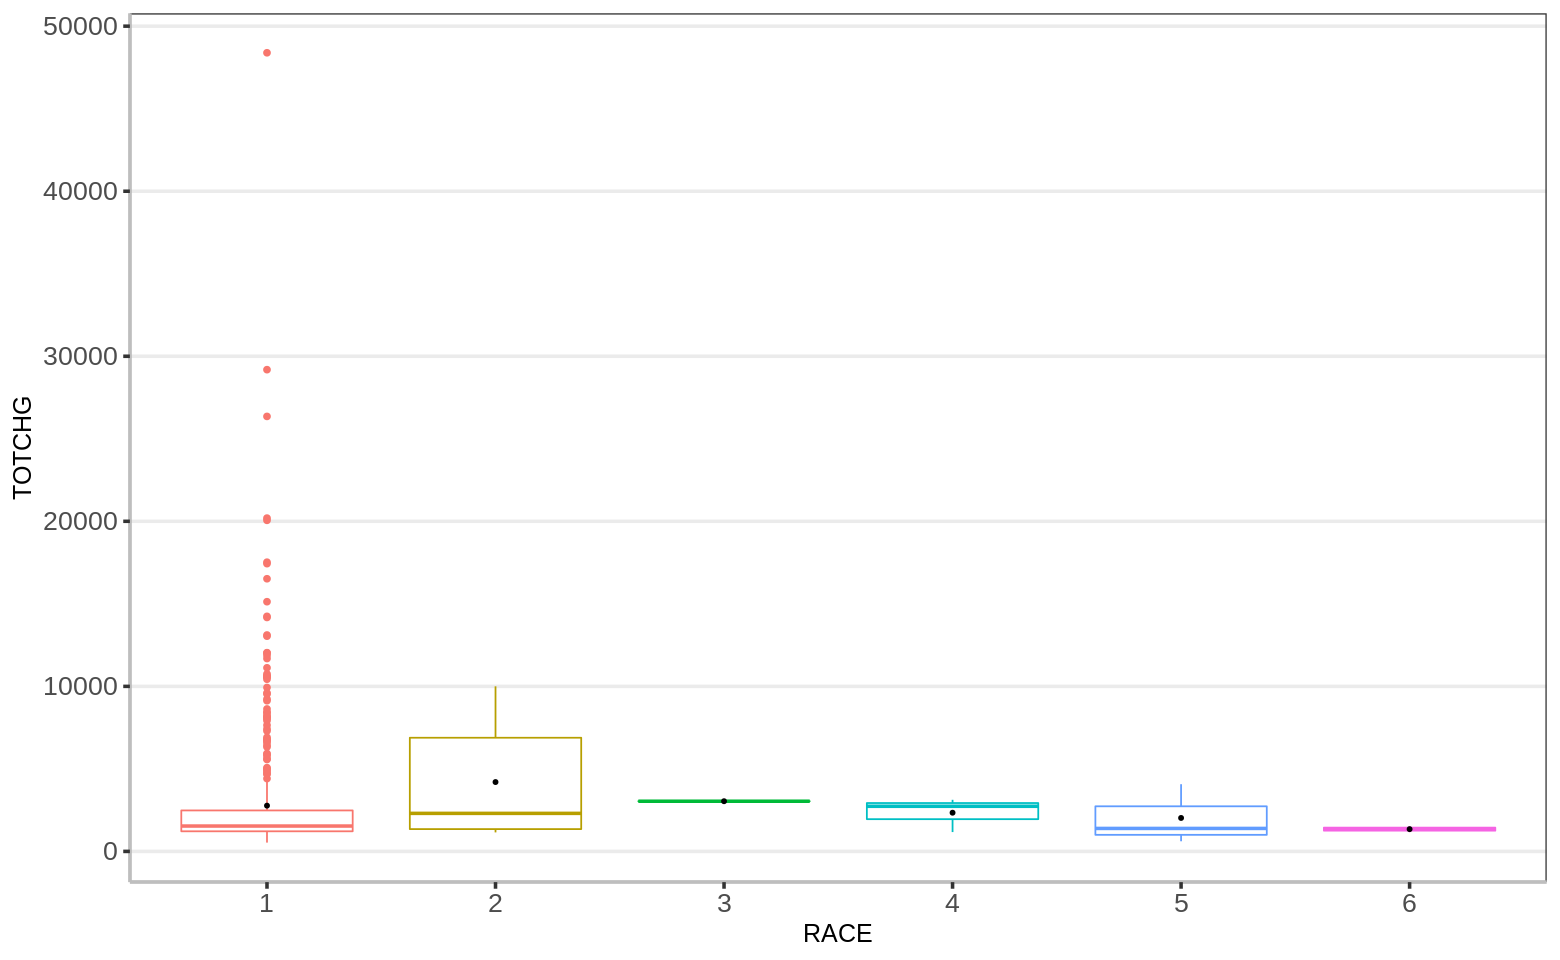

In [50]:
options(repr.plot.width = 13, repr.plot.height = 8)
ggplot(hospital_data1, aes(x=RACE, y=TOTCHG,color=RACE)) +
geom_boxplot(alpha = 1.5)+
stat_summary(fun.y="mean", geom="point", size=1, color="black")+
theme_bw(base_size = 16)+
theme(legend.position = "none",panel.background = element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.y = element_blank() ,axis.line = element_line(colour = "grey"))+
theme(text = element_text(size = 20,color="black"), element_line(size = 1),axis.title=element_text(size=15,color='black'))



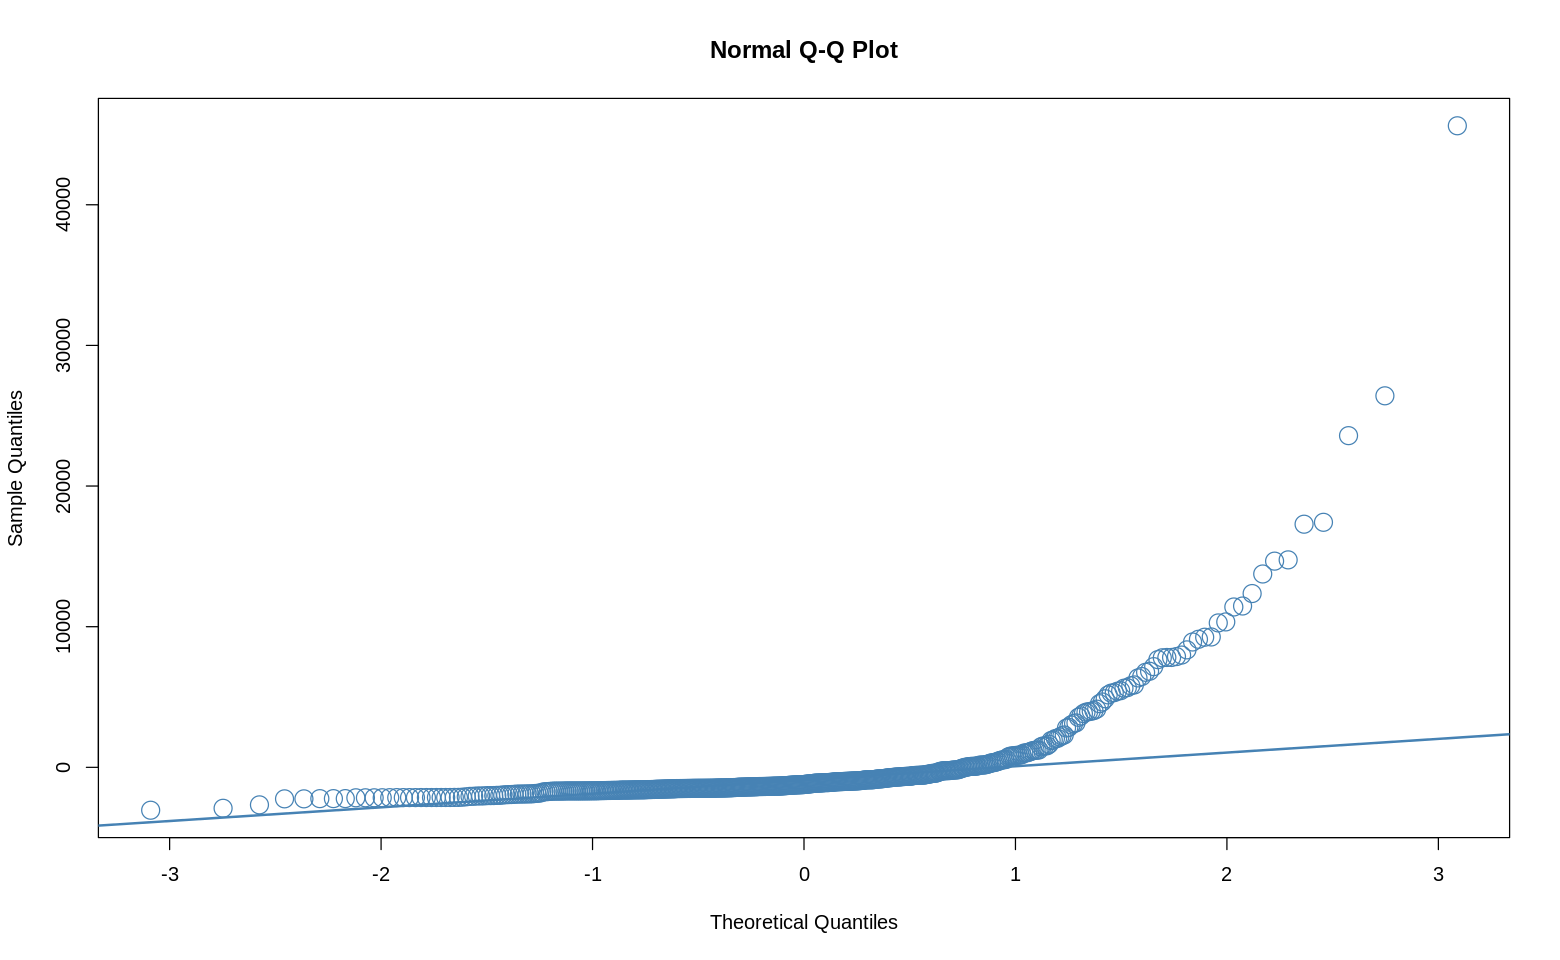

In [98]:
options(repr.plot.width = 13, repr.plot.height = 8)
qqnorm(res.aov$residuals, col = "steelblue", pch = 1, cex = 2)
qqline(res.aov$residuals, col = "steelblue", lwd = 2)

* As can be seen above, the condition of homogenity of variances does not hold here.  
*  There are outliers present in the first group.
*  QQ plot suggest the residuals do not follow a normal distribution

The above points suggest that ANOVA prediction may not be accurate.

In [103]:
hospital_data1 %>% group_by(RACE) %>%
  summarize(first=quantile(TOTCHG,probs=0.25),
            second=quantile(TOTCHG,probs=0.5),
            third=quantile(TOTCHG,probs=0.75),
            iqr=IQR(TOTCHG),
            upperwhisk=  third + 1.5 * iqr,
            lowerwhisk=  first - 1.5  * iqr, 
            minTOTCHG = min(TOTCHG), maxTOTCHG = max(TOTCHG), meanTOTCHG = mean(TOTCHG), medianTOTCHG = median(TOTCHG))

RACE,first,second,third,iqr,upperwhisk,lowerwhisk,minTOTCHG,maxTOTCHG,meanTOTCHG,medianTOTCHG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1219.25,1538,2483.75,1264.5,4380.50,-677.50,532,48388,2772.669,1538
2,1351.75,2304,6887.75,5536.0,15191.75,-6952.25,1153,10002,4202.167,2304
3,3041.00,3041,3041.00,0.0,3041.00,3041.00,3041,3041,3041.000,3041
4,1954.00,2735,2930.50,976.5,4395.25,489.25,1173,3126,2344.667,2735
5,1004.00,1393,2732.50,1728.5,5325.25,-1588.75,615,4072,2026.667,1393
6,1256.00,1349,1442.00,186.0,1721.00,977.00,1163,1535,1349.000,1349


In [53]:
res.aov <- aov(hospital_data1$TOTCHG ~ RACE, data = hospital_data1)


In [67]:
summary(res.aov)

             Df    Sum Sq  Mean Sq F value Pr(>F)
RACE          5 1.859e+07  3718656   0.244  0.943
Residuals   493 7.524e+09 15260687               

Here the P values is greater than the significance level of 0.05, in principle we could accept the null hypothesis. Means, the smean total expenses across each race is smae. So in conclusion we can say that there is no bais in the total charge acorss various race.

**How can we improve ANOVA analysis ??**

*  Try transforming the data so that it come close to Normal distribution
 
 **Box-Cox Transformation**

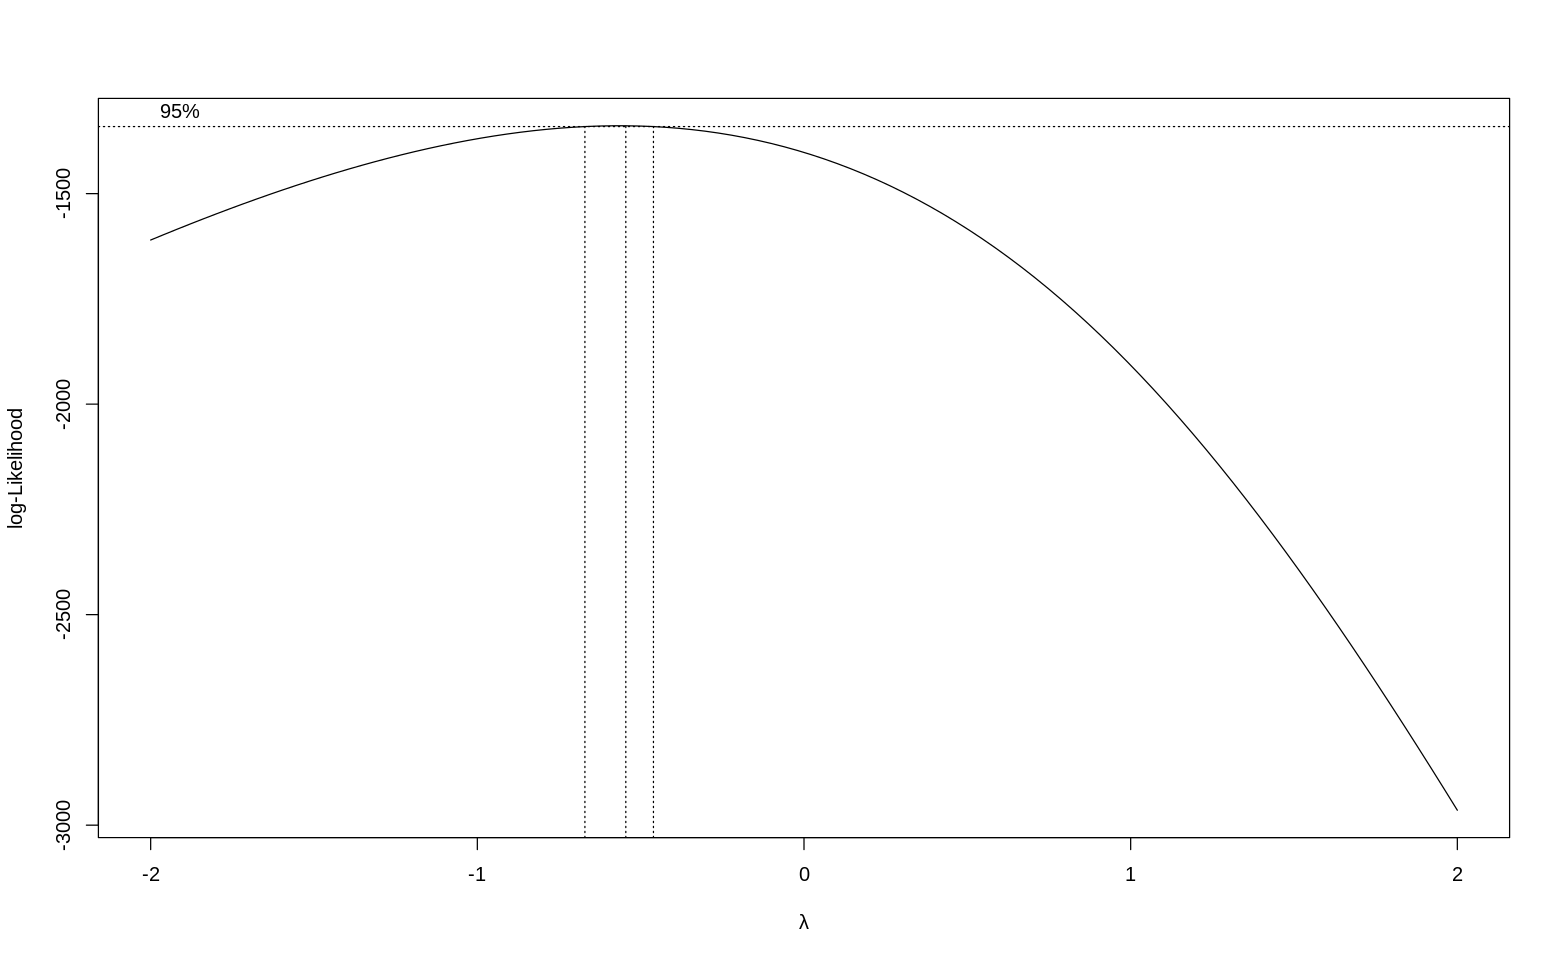

In [68]:
b <-boxcox(lm(hospital_data1$TOTCHG ~ 1))
lambda <- b$x[which.max(b$y)]

In [69]:
lambda

[1] -0.5454545

In [70]:
newres.aov <- aov((hospital_data1$TOTCHG^lambda - 1) / lambda ~ RACE, data = hospital_data1)

In [71]:
summary(newres.aov)

             Df  Sum Sq   Mean Sq F value Pr(>F)
RACE          5 0.00041 8.233e-05    0.72  0.608
Residuals   493 0.05634 1.143e-04               

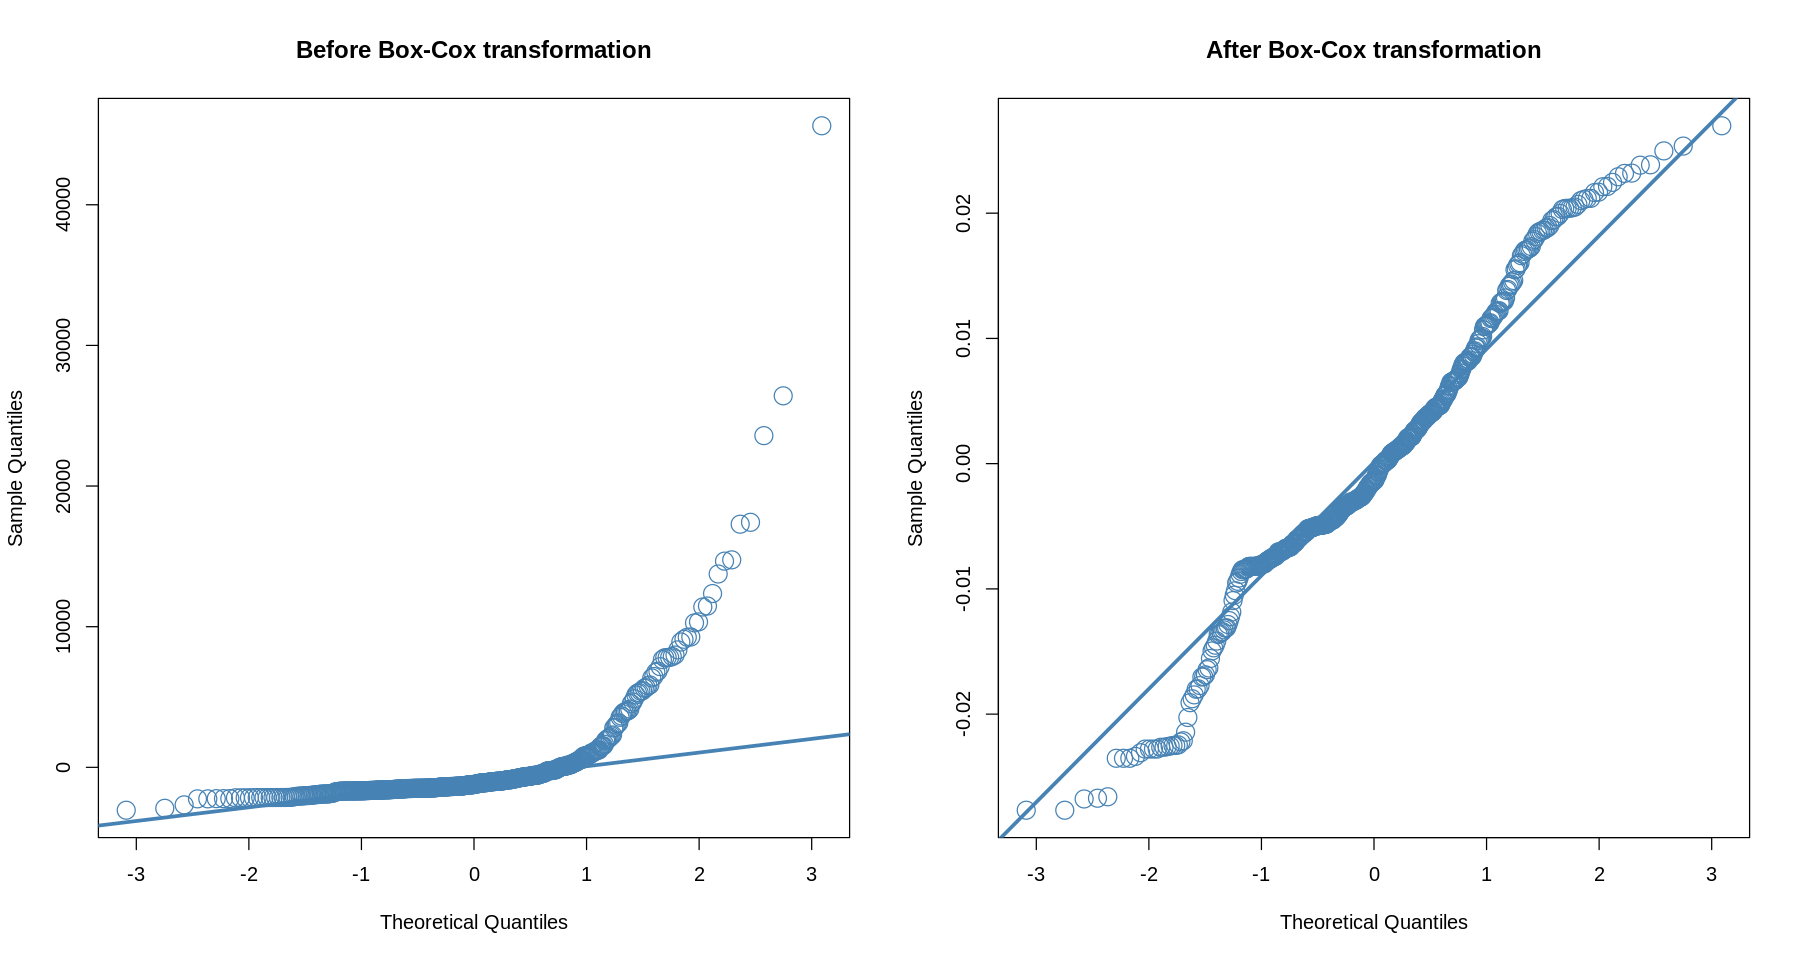

In [97]:
options(repr.plot.width = 15, repr.plot.height = 8)

par(mfrow=c(1,2))    # set the plotting area into a 1*2 array
qqnorm(res.aov$residuals, main="Before Box-Cox transformation",, col = "steelblue", pch = 1, cex = 2)
qqline(res.aov$residuals, col = "steelblue", lwd=3)

qqnorm(newres.aov$residuals,main="After Box-Cox transformation", col = "steelblue", pch = 1, cex = 2)
qqline(newres.aov$residuals, col = "steelblue", lwd=3)

In [73]:
shapiro.test((hospital_data1$TOTCHG^lambda - 1) / lambda)


	Shapiro-Wilk normality test

data:  (hospital_data1$TOTCHG^lambda - 1)/lambda
W = 0.97478, p-value = 1.412e-07


Even after Box-Cox residuals devaite from Normality

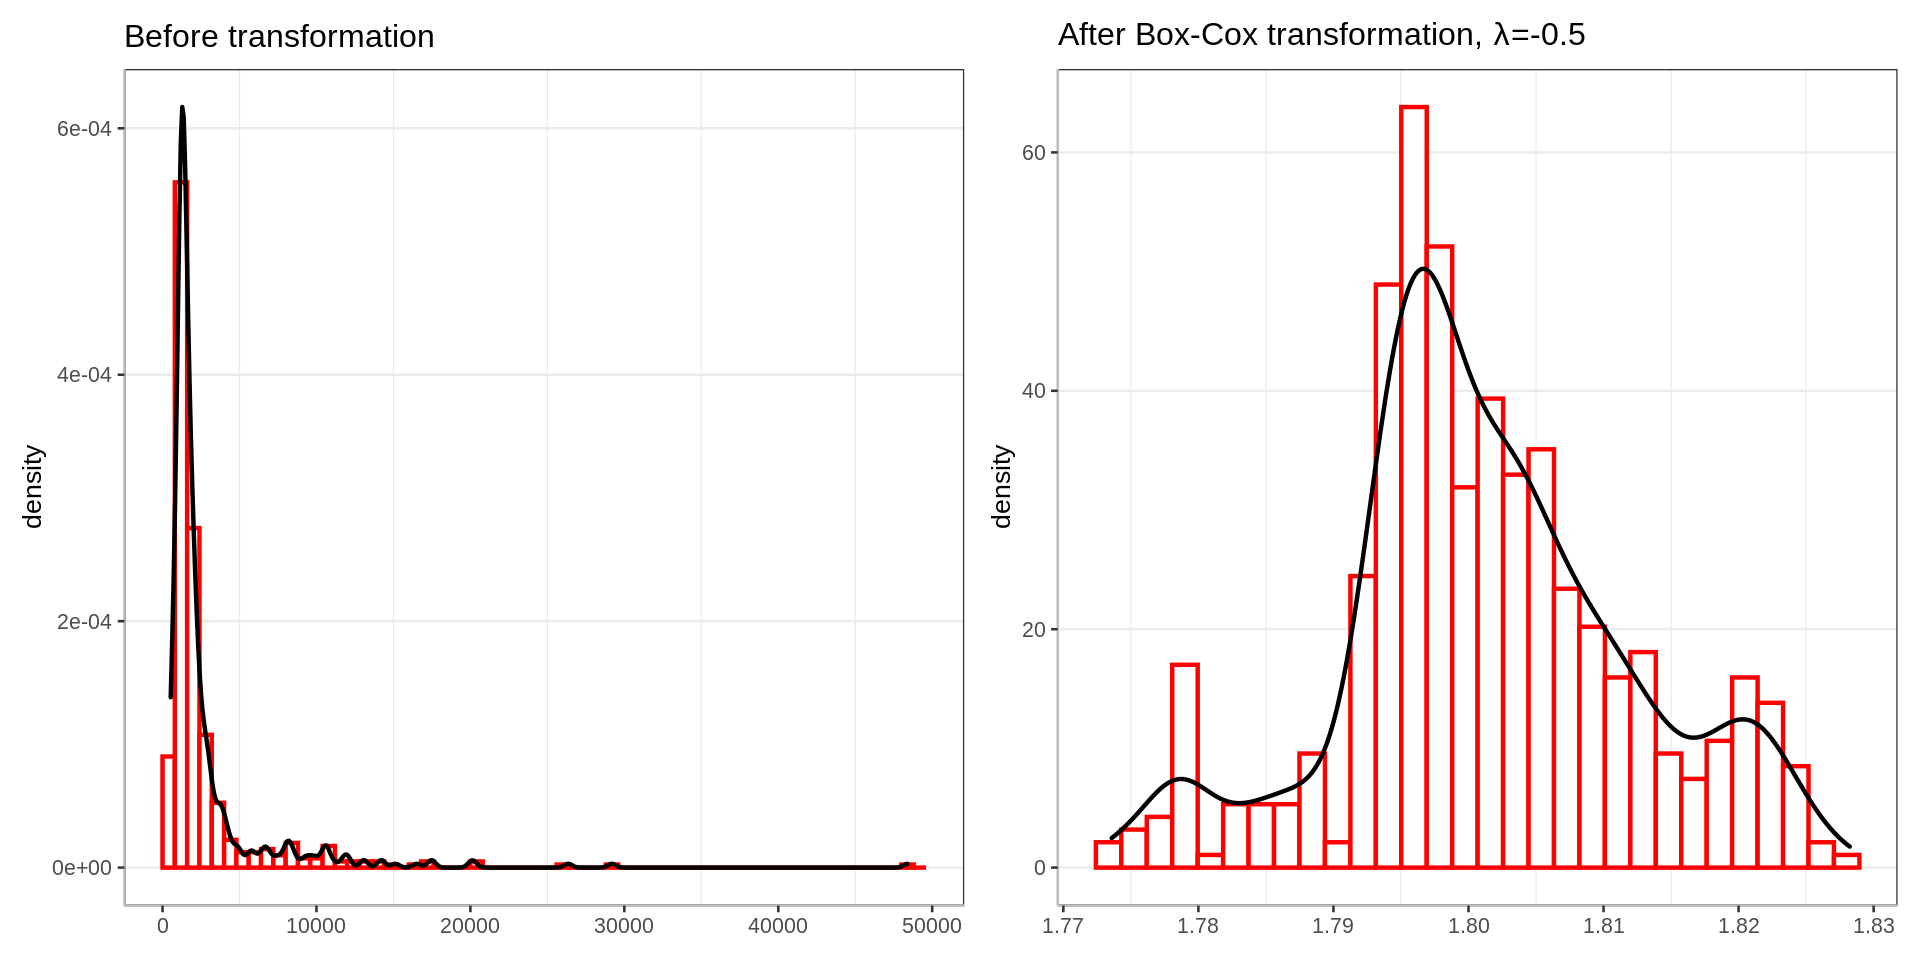

In [99]:
options(repr.plot.width = 16, repr.plot.height = 8)

p1 <- ggplot(data=hospital_data1, aes(TOTCHG)) + 
geom_histogram(aes(y =..density..),col="red", 
                 fill="white", bins = 30, breaks=seq(0, 50000, by = 800),size=1.25)+
geom_density(color= "black",size=1.25)+
theme_bw(base_size = 16)+
theme(legend.position = "none",panel.background = element_blank(),axis.title.x=element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.y = element_blank() ,axis.line = element_line(colour = "grey"))+
ggtitle("Before transformation") 


p2 <- ggplot(data=hospital_data1, aes((TOTCHG^lambda - 1) / lambda)) + 
geom_histogram(aes(y =..density..), col="red", 
                 fill="white", bins = 30, size=1.25)+
geom_density(color= "black",size=1.25)+theme_bw(base_size = 16)+
theme(legend.position = "none",panel.background = element_blank(), axis.title.x=element_blank(), panel.grid.major.x = element_blank(), panel.grid.minor.y = element_blank() ,axis.line = element_line(colour = "grey"))+
ggtitle(expression(paste("After Box-Cox transformation, ", lambda, "=-0.5 ")))



p1+ p2                

The  distribution has become more-like Normal after transformation

Based on the above discussion, one ANOVA results are not relaible here. So we also conduct Kruskal-Wallis test,which is a non-parametric test used to compare medians three or more independent groups. 

The Kruskal-Wallis test does not assume normality in the data and is much less sensitive to outliers than the one-way ANOVA.

In [101]:
kruskal.test(hospital_data1$TOTCHG ~ RACE, data = hospital_data1)


	Kruskal-Wallis rank sum test

data:  hospital_data1$TOTCHG by RACE
Kruskal-Wallis chi-squared = 3.2701, df = 5, p-value = 0.6584


Kruskal-Wallis test suggests that there is no significant difference among the different RACE gropus.